In [4]:
import numpy as np                         
import pandas as pd         
import matplotlib.pyplot as plt         
import re                                  
import string                              
import nltk                                
from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer       
import random                             

%matplotlib inline   

### Importing Data

In [5]:
df = pd.read_csv('labeled_data.csv')



In [6]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [7]:
df = df.drop(['Unnamed: 0','count','hate_speech', 'offensive_language', 'neither'], axis=1)

In [8]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   24783 non-null  int64 
 1   tweet   24783 non-null  object
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


In [10]:
text_length = []
for i in range(len(df)):
    text_length.append(len(df['tweet'][i]))
df['text length'] = text_length

In [11]:
df.head()

,class,tweet,text length
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


In [12]:
df.shape

(24783, 3)

### Exploratory Data Analysis

<AxesSubplot:ylabel='Frequency'>

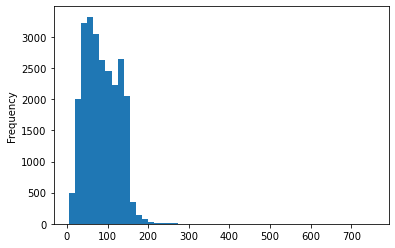

In [13]:
df['text length'].plot(bins=50, kind='hist') 

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

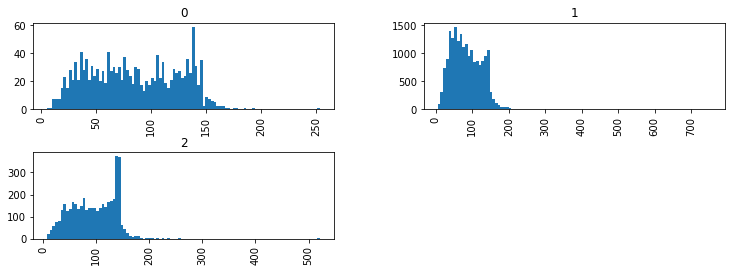

In [14]:
df.hist(column='text length', by='class', bins=100,figsize=(12,4))

### Text Processing

In [15]:
for i in range(10):
    print(df['tweet'][random.randint(0,24783)])

&#8220;@dlogue22: Asians have short beds, my feet are hanging off the edge of the bed &#128514;&#8221; cuddle me bitch I'm right beside you
Fake niccas ain't far dog they right in ya face!
That's what I tell my hoes when they ain't throwing the neck RT "@shibermetimbers: Aint nobody got time for that"
Suddenlink is trash. Y'all know how important Bubble Guppies is to our day?
That bitch said her pussy pops severely thoe &#128514;&#128514;&#128514;&#128514;
If you a top notch bitch lemme here you holler. (:
RT @Lyl_HOE: I heard "Love Dont Love You" by En Vogue at work lastnight .. Shit groovy as a bitch ..
@youngscooter ghetto gold needa be the first music vid!
Tired of these niggas turning females into stuck up bitches
Heard I fuck with them bitches &#128530;&#128545;&#128074;&#128080;&#9996;&#65039; Now you mad tripping &#128581;&#128554;&#9996;&#65039;


In [16]:
def normalize_opinion(text):
    # import the english stop words list from NLTK
    stop_words = set(stopwords.words('english'))
    
    # Instantiate stemming class
    stemmer = PorterStemmer() 
    
    filtered_text = []

    # Tokenization, lowercasing, removing stop words and punctuation and stemming
    filtered_text = [stemmer.stem(w.lower()) for w in nltk.word_tokenize(text) if 
                         w not in string.punctuation and
                         w.lower() not in stop_words]   
    
    # Return the the list of tokens converted into a string    
    return  ' '.join(filtered_text)

In [17]:
df['normalized_tweet'] = df['tweet'].apply(lambda x: normalize_opinion(x))

In [18]:
df.head()

,class,tweet,text length,normalized_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,rt mayasolov woman n't complain clean hous amp...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,rt mleew17 boy dat cold ... tyga dwn bad cuffi...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,rt urkindofbrand dawg rt 80sbaby4lif ever fuck...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,rt c_g_anderson viva_bas look like tranni
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,rt shenikarobert shit hear might true might fa...


In [19]:
df.isnull().sum()

class               0
tweet               0
text length         0
normalized_tweet    0
dtype: int64

### Train and Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df['normalized_tweet'], df['class'] ,test_size=0.3,random_state=42)


### Vectorization

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
bow_transformer = CountVectorizer()

In [24]:
bow_transformer.fit(X_train)

CountVectorizer()

In [25]:
print(f'There are {len(bow_transformer.get_feature_names())} tokens in the vocabulary:')
print(bow_transformer.get_feature_names())

There are 24768 tokens in the vocabulary:
['00', '000', '0000000000000', '007beardownjedi', '007hertzrumbl', '007m_h', '00_jacki', '00am', '00pm', '00sexilexi00', '01', '0124jessi', '01takesthelead', '01vjzqnahh', '02', '0221', '0300', '03as6bgqec', '03otpzxcbi', '03s8desezq', '05', '05235fd083ad408', '05professor', '06', '060glx19or', '06olvik6ld', '07cannon', '08', '08cqv2vccx', '09', '0_0', '0_facingr', '0a2dy3vzkm', '0b0pz8j4cm', '0bama', '0beythelau', '0beyyourmast', '0biwankob', '0ddtoddler', '0dvazwlq2q', '0g1j8bibpl', '0gexxj3svv', '0i54t117x9', '0idy5oskrf', '0iex8q4wml', '0injjm374v', '0jelcx0nku', '0l0kg', '0lrablmhb2', '0lrdpized0', '0malbndkn9', '0mk1w8reak', '0nv9chtwo', '0panscimew', '0qc5mz3pdl', '0ufahhyru', '0ushmogzdr', '0vram5pfjl', '0xdlxtoci8', '0xhpbrl9eq', '0yzgrtegaq', '0zsu3zqixd', '10', '100', '1000', '100000', '10004', '100046729', '10006', '1000gramsbe', '1000x', '10024', '10052', '10060', '10067', '10068', '10069', '10071', '10084', '100band_rel', '100d_',

In [26]:
X_train_bow = bow_transformer.transform(X_train)

In [86]:
pd.DataFrame(X_train_bow.toarray(), columns=bow_transformer.get_feature_names())

,00,000,0000000000000,007beardownjedi,007hertzrumbl,007m_h,00_jacki,00am,00pm,00sexilexi00,...,zwhite93,zwithr,zwnbhpdz8,zwrimdzqnv,zwttsb9cc1,zycuodiwkz,zzachbar,zzzentropi,zzzquil,zzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
print(f'Shape of Sparse Matrix: {X_train_bow.shape}')
print(f'Amount of Non-Zero occurences: {X_train_bow.nnz}')

# the sparsity of the matrix is calculated as the number of zero-valued elements divided by the total number of elements 
# a matrix will be sparse when its sparsity is greater than 0.5
sparsity = (X_train_bow.shape[0] * X_train_bow.shape[1] - X_train_bow.nnz)/ (X_train_bow.shape[0] * X_train_bow.shape[1]) *100
print(f'Sparsity: {sparsity}')

Shape of Sparse Matrix: (17348, 24768)
Amount of Non-Zero occurences: 158018
Sparsity: 99.96322385456195


### Training a Model

In [104]:
methods = []

In [89]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [90]:
model = OneVsRestClassifier(LinearSVC(random_state=0))

In [91]:
model.fit(X_train_bow, y_train)

OneVsRestClassifier(estimator=LinearSVC(random_state=0))

### Model Evaluation

In [92]:
X_test_bow = bow_transformer.transform(X_test)
X_test_bow.shape

(7435, 24768)

In [93]:
predictions = model.predict(X_test_bow)

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
confusion_matrix(y_test,predictions)

array([[ 129,  258,   40],
       [ 168, 5414,  165],
       [  24,  182, 1055]], dtype=int64)

In [96]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [97]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.40      0.30      0.34       427
           1       0.92      0.94      0.93      5747
           2       0.84      0.84      0.84      1261

    accuracy                           0.89      7435
   macro avg       0.72      0.69      0.71      7435
weighted avg       0.88      0.89      0.88      7435



In [102]:
modelname = model.__class__.__name__.split('.')[-1]

In [103]:
modelname

'OneVsRestClassifier'

In [105]:
modelname = model.__class__.__name__
f1score = f1_score(y_test, predictions, average='weighted')
accuracyscore = accuracy_score(y_test, predictions)
recallscore = recall_score(y_test, predictions, average='weighted')
precisionscore = precision_score(y_test, predictions, average='weighted')


methods.append([modelname, f1score, accuracyscore, recallscore, precisionscore])

In [106]:
pd.DataFrame(methods)

,0,1,2,3,4
0,OneVsRestClassifier,0.883223,0.887424,0.887424,0.879957


## Training Other Models


In [107]:
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.ensemble  import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model = ExtraTreeClassifier(random_state=0)
model.fit(X_train_bow, y_train)
predictions = model.predict(X_test_bow)
print(classification_report(y_test, predictions))

# for evaluation df
modelname = model.__class__.__name__
f1score = f1_score(y_test, predictions, average='weighted')
accuracyscore = accuracy_score(y_test, predictions)
recallscore = recall_score(y_test, predictions, average='weighted')
precisionscore = precision_score(y_test, predictions, average='weighted')


methods.append([modelname, f1score, accuracyscore, recallscore, precisionscore])


              precision    recall  f1-score   support

           0       0.30      0.31      0.30       427
           1       0.89      0.90      0.90      5747
           2       0.72      0.67      0.69      1261

    accuracy                           0.83      7435
   macro avg       0.64      0.63      0.63      7435
weighted avg       0.83      0.83      0.83      7435



In [108]:

model = ExtraTreeClassifier(random_state=0)
model.fit(X_train_bow, y_train)
predictions = model.predict(X_test_bow)
print(classification_report(y_test, predictions))

# for evaluation df
modelname = model.__class__.__name__
f1score = f1_score(y_test, predictions, average='weighted')
accuracyscore = accuracy_score(y_test, predictions)
recallscore = recall_score(y_test, predictions, average='weighted')
precisionscore = precision_score(y_test, predictions, average='weighted')


methods.append([modelname, f1score, accuracyscore, recallscore, precisionscore])



              precision    recall  f1-score   support

           0       0.30      0.31      0.30       427
           1       0.89      0.90      0.90      5747
           2       0.72      0.67      0.69      1261

    accuracy                           0.83      7435
   macro avg       0.64      0.63      0.63      7435
weighted avg       0.83      0.83      0.83      7435



In [109]:

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train_bow, y_train)
predictions = model.predict(X_test_bow)
print(classification_report(y_test, predictions))

# for evaluation df
modelname = model.__class__.__name__
f1score = f1_score(y_test, predictions, average='weighted')
accuracyscore = accuracy_score(y_test, predictions)
recallscore = recall_score(y_test, predictions, average='weighted')
precisionscore = precision_score(y_test, predictions, average='weighted')


methods.append([modelname, f1score, accuracyscore, recallscore, precisionscore])


              precision    recall  f1-score   support

           0       0.33      0.32      0.32       427
           1       0.93      0.93      0.93      5747
           2       0.84      0.85      0.84      1261

    accuracy                           0.88      7435
   macro avg       0.70      0.70      0.70      7435
weighted avg       0.88      0.88      0.88      7435



In [110]:

model = RandomForestClassifier(random_state=0)
model.fit(X_train_bow, y_train)
predictions = model.predict(X_test_bow)
print(classification_report(y_test, predictions))

# for evaluation df
modelname = model.__class__.__name__
f1score = f1_score(y_test, predictions, average='weighted')
accuracyscore = accuracy_score(y_test, predictions)
recallscore = recall_score(y_test, predictions, average='weighted')
precisionscore = precision_score(y_test, predictions, average='weighted')


methods.append([modelname, f1score, accuracyscore, recallscore, precisionscore])


              precision    recall  f1-score   support

           0       0.49      0.22      0.30       427
           1       0.91      0.96      0.93      5747
           2       0.85      0.79      0.82      1261

    accuracy                           0.89      7435
   macro avg       0.75      0.66      0.69      7435
weighted avg       0.87      0.89      0.88      7435



In [111]:

model = LogisticRegression(random_state=0, multi_class='multinomial', max_iter=1000)
model.fit(X_train_bow, y_train)
predictions = model.predict(X_test_bow)
print(classification_report(y_test, predictions))

# for evaluation df
modelname = model.__class__.__name__
f1score = f1_score(y_test, predictions, average='weighted')
accuracyscore = accuracy_score(y_test, predictions)
recallscore = recall_score(y_test, predictions, average='weighted')
precisionscore = precision_score(y_test, predictions, average='weighted')


methods.append([modelname, f1score, accuracyscore, recallscore, precisionscore])


              precision    recall  f1-score   support

           0       0.46      0.22      0.30       427
           1       0.93      0.95      0.94      5747
           2       0.84      0.89      0.86      1261

    accuracy                           0.90      7435
   macro avg       0.74      0.69      0.70      7435
weighted avg       0.89      0.90      0.89      7435



In [123]:
cols = ['Model', 'F1 Score', 'Accuracy Score', 'Recall Score', 'Precision Score']
results = pd.DataFrame(methods, columns=cols)
results.sort_values('Accuracy Score', ascending=False)


,Model,F1 Score,Accuracy Score,Recall Score,Precision Score
5,LogisticRegression,0.891532,0.900874,0.900874,0.887584
4,RandomForestClassifier,0.878100,0.888904,0.888904,0.874899
0,OneVsRestClassifier,0.883223,0.887424,0.887424,0.879957
3,DecisionTreeClassifier,0.879792,0.880296,0.880296,0.879305
1,ExtraTreeClassifier,0.829552,0.829993,0.829993,0.829466
2,ExtraTreeClassifier,0.829552,0.829993,0.829993,0.829466


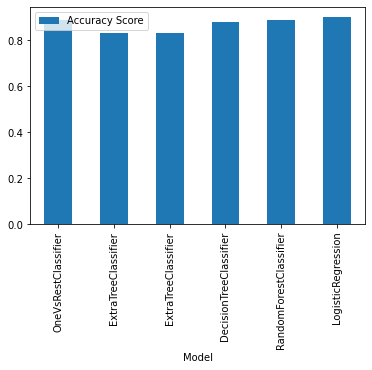

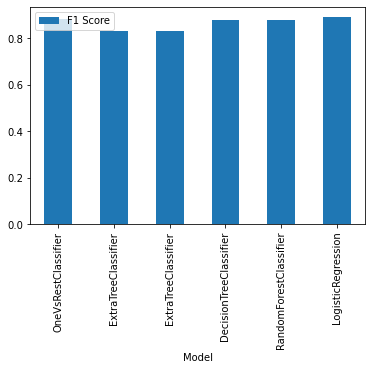

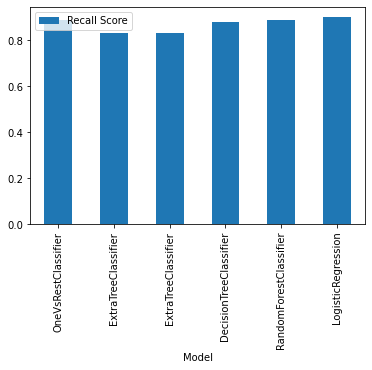

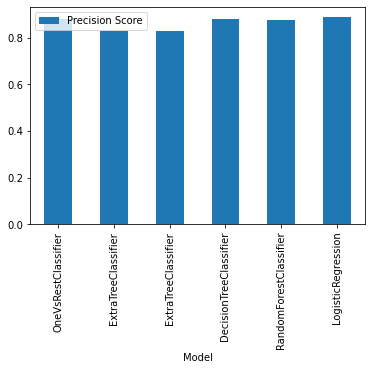

In [128]:
results.plot(x='Model', y='Accuracy Score', kind = 'bar')
results.plot(x='Model', y='F1 Score', kind='bar')
results.plot(x='Model', y='Recall Score', kind='bar')
results.plot(x='Model', y='Precision Score', kind='bar')
plt.show()

#doesnt work

model_list = [DecisionTreeClassifier(), ExtraTreesClassifier(), RandomForestClassifier(), LogisticRegression()]
for algorithm in model_list:
    model = algorithm
    model.fit(X_train_bow, y_train)
    predictions = model.predict(X_train_bow)
    print(classification_report(y_test, predictions))